# Compensated summation

## Accuracy and Stability of Numerical Algorithms
N.Higham (pages 86-87) 


A good illustration of the benefits of compensated summation is provided by Euler's method for the ordinary differential equation initial value problem $\dot{y}=f(x,y), \ y(a)$ given , which generates an approximate solution according to $y_{k+1}=y_k+hf_k, \ y_0=y(a)$, We solved the equation $\dot{y}=-y$ with $y(0)=1$ over $[0,1]$ using $n$ steps of Euler's method ($nh=1$), with $n$ ranging from $10$ to $10^8$. 

Figure 4.2 shows the errors $e_n = |y(1) - \hat{y}_n|$ , where $\hat{y}_n$ is the computed approximation to $y(l)$. The computations were done in Fortran 90 in single precision arithmetic on a Sun SPARCstation ($ u \approx 6 x 10^{-8}$). Since Euler's method has global error of order $h$, the error curve on the plot should be approximately a straight line. For the standard implementation of Euler's method the errors $e_n$ start to increase steadily beyond $n = 20000$ because of the influence of rounding errors.

<img src="Figure42.png" alt="" width="600"/>

## Experiment

In [2]:
using Pkg
using OrdinaryDiffEq,DiffEqDevTools 
using IRKGaussLegendre,LinearAlgebra,Plots
#using DoubleFloats

In [3]:
f=(du,u,p,t)->begin
    du[1]=-u[1]
end

#3 (generic function with 1 method)

In [4]:
T= Float32(1.0)
tspan=(Float32(0.0),T)
u0=[Float32(1.0)];
prob=ODEProblem(f,u0,tspan);

In [5]:
n=8
out1=[]
out2=[]
out3=[]
out4=[]
for k in 1:n
   h=Float32(1/10^k)
   if (k<8)   # k=8 fail
     sol1=solve(prob,Euler(),dt=h,save_everystep=false)
     u1=sol1.u[end]
     push!(out1,u1[1])
   end
   sol2=solve(prob,IRKGL16(),adaptive=false, dt=Float32(h^(1/16)), save_everystep=false)
   sol3=solve(prob,Vern9(),adaptive=false, dt=Float32(h^(1/9)), save_everystep=false)
   sol4=solve(prob,RK4(),adaptive=false, dt=Float32((h)^(1/4)), save_everystep=false) 
   u2=sol2.u[end]
   push!(out2,u2[1])
   u3=sol3.u[end]
   push!(out3,u3[1]) 
   u4=sol4.u[end]
   push!(out4,u4[1])
end

In [6]:
err1=norm.(out1.-exp(-1))
err2=norm.(out2.-exp(-1))
err3=norm.(out3.-exp(-1))
err4=norm.(out4.-exp(-1));

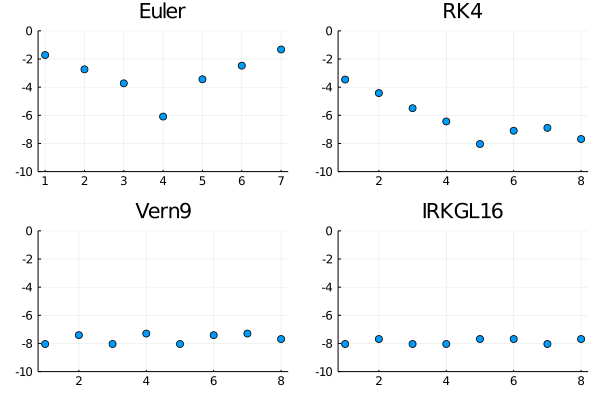

In [7]:
hh=[10, 10^(-2),10^(-3),10^(-4), 10^(-5), 10^(-6) ]

ylimit1=-10
ylimit2=0
pl1=plot(log10.(abs.(err1)),ylims=(ylimit1,ylimit2), seriestype=:scatter, title="Euler", label="")
pl2=plot(log10.(abs.(err2)),ylims=(ylimit1,ylimit2), seriestype=:scatter, title="IRKGL16", label="")
pl3=plot(log10.(abs.(err3)),ylims=(ylimit1,ylimit2), seriestype=:scatter, title="Vern9", label="")
pl4=plot(log10.(abs.(err4)),ylims=(ylimit1,ylimit2), seriestype=:scatter, title="RK4", label="")

plot(pl1,pl4,pl3,pl2, layout=(2,2)) 